This notebook is to use machine learning to predict whether the email is spam or ham (good email)

[Click here](https://www.kaggle.com/syamkakarla/spam-mail-classifier/data) to download csv data

# Import support libraries

In [13]:
# data importing, processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a data visualization library built on top of matplotlib

# text processing
import nltk # Natural Language Toolkit
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# machine learning
from sklearn.model_selection import train_test_split # Scikit-learn is a library for machine learning in Python
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# deep learning
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.models import Sequential

# Accuracy Matrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /Users/will/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/will/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Importing data

In [2]:
df = pd.read_csv('/Users/will/Documents/LandislandGithub/DataAnalysis/Spamemail/spam_ham_dataset.csv')
# Removing Unnecessary column
df.drop('Unnamed: 0', axis = 1, inplace = True)
# Changing column names
df.columns = ['label', 'text', 'class']

In [3]:
df.head()

,label,text,class
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.shape

(5171, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
 2   class   5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [6]:
df.isna().sum()

label    0
text     0
class    0
dtype: int64

Great, no NaN in our dataset now

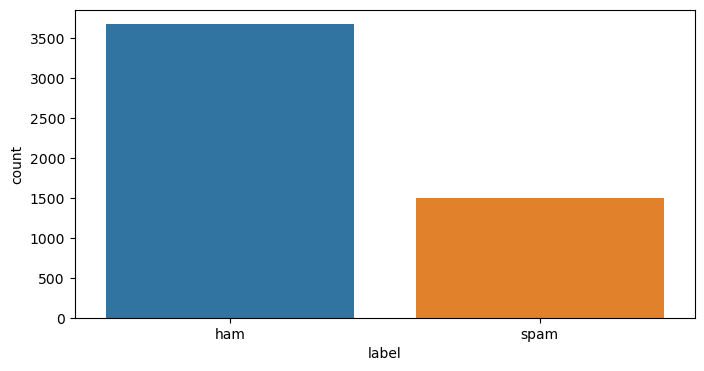

In [41]:
# Barplot describes the count of the class labels
plt.figure(figsize = (8, 4))
sns.countplot(data = df, x = 'label');
plt.show()

In [9]:
# Let's see few examples of the data

for i in df.iterrows():
    print("Class Label: {}\nMail: \n{}\n\n".format(i[1][0], i[1][1]))
    if i[0] == 3: break

Class Label: ham
Mail: 
Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


Class Label: ham
Mail: 
Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls


Class Label: ham
Mail: 
Subject: neon retreat
ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !
i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .
on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 

# Remove stopwords from the data

In [14]:
%%time
stop_words = set(stopwords.words('english')) 

df['text'] = df['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

CPU times: user 7.73 s, sys: 44.4 ms, total: 7.77 s
Wall time: 8.02 s


In [15]:
df.sample(10)

,label,text,class
3901,spam,Subject : ordering pain medication page loadin...,1
2258,ham,Subject : organizational changes please share ...,0
1126,ham,Subject : february buyback deals case want aro...,0
5030,ham,Subject : revised nom 5 / 5 - eastrans ; revis...,0
4987,spam,Subject : live large - rolex replicas online !...,1
1163,ham,Subject : opportunity change electricity provi...,0
3877,ham,Subject : intraday eastrans nominations change...,0
1106,ham,Subject : mobil discrepancies daren : ' come t...,0
2574,ham,"Subject : enron / hpl actuals november 30 , 20...",0
4719,ham,Subject : tenaska iv - - cleburne march 2001 s...,0


In [16]:
X = df.loc[:, 'text']
y = df.loc[:, 'class']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (5171,)
shape of y: (5171,)


# Split data into train and test in 80:20

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [21]:
print(f"Train Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Train Data Shape: (4136,)
Test Data Shape: (1035,)


# Preprocess text to build the ML mdel

In [22]:
cVect = CountVectorizer()
cVect.fit(X_train)

CountVectorizer()

Let's see the vocabulary that has extracted by the count vextorizer

In [23]:
print('NO.of Tokens: ',len(cVect.vocabulary_.keys()))

NO.of Tokens:  44255


In [24]:
# document term vector (dtv)
dtv = cVect.transform(X_train)

In [25]:
type(dtv)

scipy.sparse.csr.csr_matrix

In [26]:
dtv = dtv.toarray()

In [27]:
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 4136
Tokens/Features: 44255


In [28]:
# Let's see an sample that has been preprocessed
dtv[1]

array([0, 0, 0, ..., 0, 0, 0])

## Logistic Regression.

Logistic Regression could help use predict whether the student passed or failed. Logistic regression predictions are discrete (only specific values or categories are allowed). We can also view probability scores underlying the model’s classifications.

## Hyperparameter Tuning

In [29]:
lr = LogisticRegression(verbose=1)

grid={"C":[float(i) for i in range(1, 3)], "penalty":["l2"], "solver":[ 'lbfgs', 'liblinear']}
logreg_cv=GridSearchCV(lr, grid, cv=4)
logreg_cv.fit(dtv,y_train)

print("Tuned Hpyerparameters :",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s finished


[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Tuned Hpyerparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.97678916827853


In [30]:
%%time
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(dtv, y_train)

CPU times: user 1.82 s, sys: 513 ms, total: 2.33 s
Wall time: 2.7 s


LogisticRegression(solver='liblinear')

## Evaluate on the Test data

In [31]:
# Preprocess the test data
test_dtv = cVect.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens/Features: {test_dtv.shape[1]}")

Number of Observations: 1035
Tokens/Features: 44255


In [32]:
%%time
pred = lr.predict(test_dtv)

CPU times: user 196 ms, sys: 179 ms, total: 374 ms
Wall time: 369 ms


In [33]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  98.35748792270532


## Classification Report of the classifier

In [34]:
# 0 - Not Spam / Ham
# 1 - Spam 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       744
           1       0.95      0.99      0.97       291

    accuracy                           0.98      1035
   macro avg       0.97      0.99      0.98      1035
weighted avg       0.98      0.98      0.98      1035



## Confusion Matrix

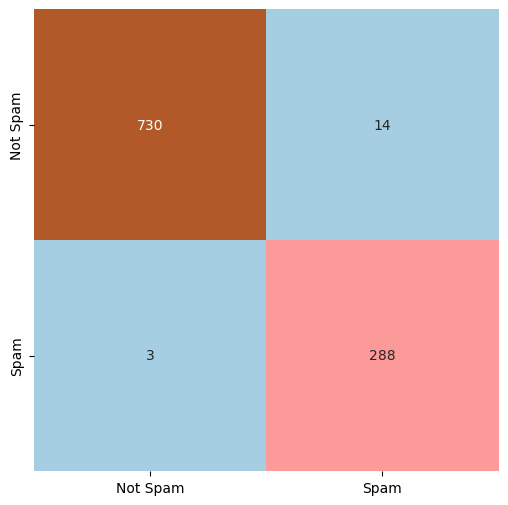

In [38]:
cmat = confusion_matrix(y_test, pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);
plt.show()